In [1]:
!pip install afinn
from afinn import Afinn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 KB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for afinn: filename=afinn-0.1-py3-none-any.whl size=53448 sha256=e7d57a37af3dff48eb1cec7812c5347f0ba091ffa284eb0f687251e7b6c69f22
  Stored in directory: /root/.cache/pip/wheels/79/91/ee/8374d9bc8c6c0896a2db75afdfd63d43653902407a0e76cd94
Successfully built afinn


In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt  

In [7]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [8]:
data_reviews = pd.read_csv('/content/cleaned_playstore_reviews.csv')
data_apps = pd.read_csv('/content/drive/MyDrive/DevelHope/Google Playstore Data/cleaned_playstore.csv')

In [9]:
data_apps.columns

Index(['Unnamed: 0', 'App', 'Category', 'Rating', 'Reviews', 'Size',
       'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated',
       'Current Ver', 'Android Ver'],
      dtype='object')

In [10]:
data_reviews.sort_values('App')

,Unnamed: 0,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333
1,1,104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室,Great,Positive,0.800000,0.750000
2,2,11st,Horrible ID verification,Negative,-1.000000,1.000000
3,3,1800 Contacts - Lens Store,Great hassle free way order contacts. Got call...,Positive,0.600000,0.775000
4,4,1LINE – One Line with One Touch,"gets 1* there's ad every single level restart,...",Negative,-0.157143,0.704762
...,...,...,...,...,...,...
636,636,Hotels Combined - Cheap deals,Totally unimpressed. We booking hotels Vietnam...,Negative,-0.083333,0.427778
637,637,Hotels.com: Book Hotel Rooms & Find Vacation D...,Bookings stopped showing app. Helpline useless...,Positive,0.291667,0.566667
638,638,Hotspot Shield Free VPN Proxy & Wi-Fi Security,7 days free trial asking credit card. Stupid!!!,Negative,-0.300000,0.900000
639,639,Hotstar,running,Neutral,0.000000,0.000000


In [11]:
data_apps['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

### Week4 Task1

In [15]:
data_price_content_rating = data_apps.groupby(['Content Rating'])["Price"].mean().reset_index()

In [16]:
data_price_content_rating

,Content Rating,Price
0,Adults only 18+,0.000000
1,Everyone,1.229916
2,Everyone 10+,0.433851
3,Mature 17+,0.259847
4,Teen,0.633475
5,Unrated,0.000000


<Figure size 640x480 with 0 Axes>

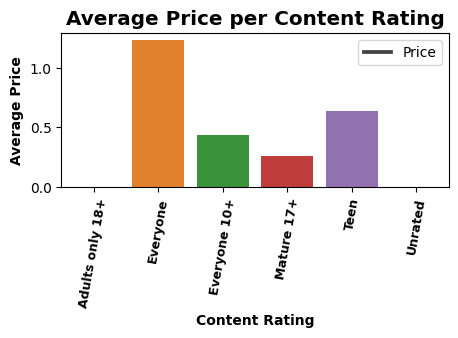

In [22]:
plt.figure()
f, ax = plt.subplots(figsize=(5,2))
g = sns.barplot (x= 'Content Rating', y='Price', data=data_price_content_rating)
plt.legend(['Price'])
plt.title("Average Price per Content Rating",weight = 'bold', fontsize= 'x-large')
plt.xlabel('Content Rating', weight = 'bold')
plt.ylabel('Average Price', weight = 'bold')
g.set_xticklabels(labels = data_price_content_rating['Content Rating'], rotation=80, fontsize = 9, weight = 'bold')
plt.show(g)

### Week4 Task2

In [23]:
data_reviews.head(2)

,Unnamed: 0,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.0,0.533333
1,1,104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室,Great,Positive,0.8,0.750000


In [24]:
data_n = pd.read_excel('/content/n.xlsx')

In [25]:
data_p = pd.read_excel('/content/p.xlsx')

In [26]:
data_p[:5]

,abound
0,abounds
1,abundance
2,abundant
3,accessable
4,accessible


In [27]:
data_n[:5]

,faced
0,faces
1,abnormal
2,abolish
3,abominable
4,abominably


In [28]:
data_reviews['Translated_Review'] = data_reviews.Translated_Review.apply(str.lower)
data_reviews.head(5)

,Unnamed: 0,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,0,10 Best Foods for You,i like eat delicious food. that's i'm cooking ...,Positive,1.000000,0.533333
1,1,104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室,great,Positive,0.800000,0.750000
2,2,11st,horrible id verification,Negative,-1.000000,1.000000
3,3,1800 Contacts - Lens Store,great hassle free way order contacts. got call...,Positive,0.600000,0.775000
4,4,1LINE – One Line with One Touch,"gets 1* there's ad every single level restart,...",Negative,-0.157143,0.704762


In [29]:
data_reviews.describe()

,Unnamed: 0,Sentiment_Polarity,Sentiment_Subjectivity
count,641.000000,641.000000,641.000000
mean,320.000000,0.160982,0.497001
std,185.185043,0.297465,0.213921
min,0.000000,-1.000000,0.000000
25%,160.000000,0.000000,0.400000
50%,320.000000,0.151515,0.501852
75%,480.000000,0.328333,0.614626
max,640.000000,1.000000,1.000000


###### Cleaning a little

In [30]:
import string
def string_clean(sent):
 return sent.translate(str.maketrans('','',string.punctuation))

In [31]:
data_reviews['Translated_Review'] = data_reviews.Translated_Review.apply(string_clean)
data_reviews.head(10)

,Unnamed: 0,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,0,10 Best Foods for You,i like eat delicious food thats im cooking foo...,Positive,1.000000,0.533333
1,1,104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室,great,Positive,0.800000,0.750000
2,2,11st,horrible id verification,Negative,-1.000000,1.000000
3,3,1800 Contacts - Lens Store,great hassle free way order contacts got call ...,Positive,0.600000,0.775000
4,4,1LINE – One Line with One Touch,gets 1 theres ad every single level restart fr...,Negative,-0.157143,0.704762
5,5,2018Emoji Keyboard 😂 Emoticons Lite -sticker&gif,like the old version better where backspace is...,Positive,0.300000,0.350000
6,6,21-Day Meditation Experience,terrible not userfriendly like original app pl...,Negative,-0.265625,0.875000
7,7,"2Date Dating App, Love and matching",this good dating app i love much this lot chin...,Positive,0.250980,0.532773
8,8,2GIS: directory & navigator,thanks lot excellent map 2gis i love it like m...,Positive,0.475000,0.500000
9,9,2RedBeans,what waiting for join platform thank later,Neutral,0.000000,0.000000


##### Sentiments analysis using n and p files

In [36]:
from collections import Counter
n = Counter ( list(data_n.faced) ) 
p = Counter ( list(data_p.abound) ) 

def sentiment_func(sent):
  c_sent = Counter(sent.split(' '))

  tot_n = n + c_sent
  tot_p = p + c_sent

  duplicates_n = Counter({k: c for k, c in tot_n.items() if c > 1})
  res_n = sum(duplicates_n.values()  )

  duplicates_p = Counter({k: c for k, c in tot_p.items() if c > 1})
  res_p = sum(duplicates_p.values()  )

  return (res_p - res_n) * 3

##### Sentiment analysis using Afinn library

In [37]:
afinn = Afinn()
afinn.score('ugly')

-3.0

In [38]:
df = data_reviews[['App','Translated_Review','Sentiment_Polarity']]

In [39]:
df['np_sentiments'] = data_reviews.Translated_Review.apply(sentiment_func)

<ipython-input-39-8be1e6602e1b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['np_sentiments'] = data_reviews.Translated_Review.apply(sentiment_func)


In [41]:
df['afinn_sentiments'] = data_reviews.Translated_Review.apply( Afinn().score)

<ipython-input-41-9f8f68f9ac0e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['afinn_sentiments'] = data_reviews.Translated_Review.apply( Afinn().score)


In [42]:
df.sort_values(['App']).head(4)

,App,Translated_Review,Sentiment_Polarity,np_sentiments,afinn_sentiments
0,10 Best Foods for You,i like eat delicious food thats im cooking foo...,1.0,15,13.0
1,104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室,great,0.8,6,3.0
2,11st,horrible id verification,-1.0,-6,-3.0
3,1800 Contacts - Lens Store,great hassle free way order contacts got call ...,0.6,6,4.0


### Week4 Task3

In [43]:
#we joined two datasets and only rows that are common in both are displayed
data_merged = pd.merge(df, data_apps, how='inner', on='App')

In [44]:
data_merged.head()

,App,Translated_Review,Sentiment_Polarity,np_sentiments,afinn_sentiments,Unnamed: 0,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,10 Best Foods for You,i like eat delicious food thats im cooking foo...,1.000000,15,13.0,1142,HEALTH_AND_FITNESS,4.0,2490.0,3.800000e+06,500000.0,Free,0.0,Everyone 10+,Health & Fitness,2017-02-17,1.9,2.3.3 and up
1,11st,horrible id verification,-1.000000,-6,-3.0,2121,SHOPPING,3.8,48732.0,2.000000e+07,10000000.0,Free,0.0,Everyone,Shopping,2018-07-31,7.8.1,4.0 and up
2,1800 Contacts - Lens Store,great hassle free way order contacts got call ...,0.600000,6,4.0,1824,MEDICAL,4.7,23160.0,2.600000e+07,1000000.0,Free,0.0,Everyone,Medical,2018-07-27,7.4.1,5.0 and up
3,1LINE – One Line with One Touch,gets 1 theres ad every single level restart fr...,-0.157143,-6,-2.0,1567,GAME,4.6,214878.0,1.000000e+07,10000000.0,Free,0.0,Everyone,Board,2018-08-03,2.0.4,4.1 and up
4,2018Emoji Keyboard 😂 Emoticons Lite -sticker&gif,like the old version better where backspace is...,0.300000,12,4.0,2714,PERSONALIZATION,4.2,115773.0,2.039287e+07,10000000.0,Free,0.0,Everyone,Personalization,2018-05-22,Varies with device,4.1 and up


##### Top 5 apps

In [56]:
data_paid = data_merged['Type'] == 'Paid'
data_paid2 = data_merged[data_paid]
data_paid2.sort_values('afinn_sentiments',ascending=False).head(5)[['App','afinn_sentiments']]

,App,afinn_sentiments
371,Essential Anatomy 3,12.0
111,BIG Launcher,6.0
147,Beautiful Widgets Pro,6.0
550,HD Widgets,6.0
216,Call of Duty:Black Ops Zombies,3.0


##### Lowest 5 apps

In [58]:
data_paid2.sort_values('afinn_sentiments',ascending=False).tail(5)[['App','afinn_sentiments']]

,App,afinn_sentiments
550,HD Widgets,6.0
216,Call of Duty:Black Ops Zombies,3.0
522,Golfshot Plus: Golf GPS,0.0
412,Farming Simulator 18,-3.0
313,Diabetes & Diet Tracker,-4.0


### Wek4 Task4

In [46]:
data_merged.Type.unique()

array(['Free', 'Paid'], dtype=object)

In [64]:
data_paid2 = data_merged
data_paid2.sort_values('afinn_sentiments',ascending=False).head(10)[['App', 'Category', 'afinn_sentiments']]

,App,Category,afinn_sentiments
565,Hamilton — The Official App,ENTERTAINMENT,36.0
76,Angry Birds 2,GAME,32.0
545,HBO GO: Stream with TV Package,ENTERTAINMENT,30.0
259,Clash of Clans,GAME,27.0
144,BeWild Free Dating & Chat App,DATING,25.0
569,Happy Street,FAMILY,22.0
319,Digit Save Money Automatically,FINANCE,22.0
563,Hacker's Keyboard,PRODUCTIVITY,21.0
401,Fallout Shelter,GAME,21.0
593,Home Workout - No Equipment,HEALTH_AND_FITNESS,20.0


In [66]:
data = data_paid2.groupby('Category')['afinn_sentiments'].mean().reset_index()
data.head()
data.sort_values(['afinn_sentiments'], ascending=False)

,Category,afinn_sentiments
14,GAME,6.819444
9,ENTERTAINMENT,6.047619
8,EDUCATION,5.764706
10,EVENTS,5.500000
15,HEALTH_AND_FITNESS,5.466667
17,LIBRARIES_AND_DEMO,5.111111
6,COMMUNICATION,5.045455
20,MEDICAL,4.758621
24,PHOTOGRAPHY,4.500000
11,FAMILY,4.243243
